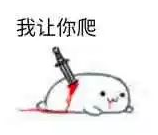

# 网络基础

## 补充：二维码

In [3]:
!pip install qrcode

You should consider upgrading via the 'c:\pyenv\anaconda3\python.exe -m pip install --upgrade pip' command.


生成二维码

In [31]:
import qrcode
qr = qrcode.QRCode(
    version=2, #二维码的格子矩阵大小
    error_correction=qrcode.constants.ERROR_CORRECT_Q,
    box_size=40,
    border=4,
)

qr.add_data('nice try')#向二维码添加数据
qr.make(fit=True)
img = qr.make_image(fill_color="green", back_color="white")#更改QR的背景和绘画颜色
img.show()# 显示二维码
img.save('./pic/qr.jpg')

* error_ correction:控制二维码纠错级别。

* ERROR_ CORRECT_ _L:大约7%或者更少的错误会被更正。

* ERROR_ CORRECT_ _M:默认值，大约15%或者更少的错误会被更正。

* ERROR_ CORRECT_ Q:大约25%或者更少的错误会被更正。

* ERROR_ CORRECT_ H:大约30%或者更少的错误会被更正。

* box_ size: 控制二维码中每个格子的像素数，默认为10。

* border:控制二维码四周留白包含的格子数，默认为4。

* image_ factory: 选择生成图片的形式，默认为PIL图像。

* mask_ pattern: 选择生成图片的的掩模。

动态二维码

In [15]:
!pip install myqr

You should consider upgrading via the 'c:\pyenv\anaconda3\python.exe -m pip install --upgrade pip' command.



  Created wheel for myqr: filename=MyQR-2.3.1-py3-none-any.whl size=16673 sha256=3b59bb5db0f99458986ed4508ce8be91c5193a88003e6ac541dabc5a8b934777
  Stored in directory: c:\users\think\appdata\local\pip\cache\wheels\f8\b0\38\01c1fd37a94a2046d4fda17344fbecb454f1a907e8482d6d82
Successfully built myqr


In [18]:
from MyQR import myqr

myqr.run(
    words='nice try', # 扫描二维码后，显示的内容，或是跳转的链接
    version=5,# 设置容错率
    level='H',# 控制纠错水平，范围是L、M、Q、H，从左到右依次升高
    picture='./pic/zzx.gif',# 图片所在目录，可以是动图
    colorized=True, # 黑白(False)还是彩色(True)
    contrast=1.0, # 用以调节图片的对比度，1.0 表示原始图片。默认为1.0。
    brightness=1.0, # 用来调节图片的亮度，用法同上。
    save_name='./pic/zzxqr.gif' # 控制输出文件名，格式可以是 .jpg， .png ，.bmp ，.gif
)

line 16: mode: byte


(5, 'H', 'C:\\Users\\Think\\课程\\3UB_python基础\\./pic/zzxqr.gif')

识别二维码

In [20]:
!pip install pyzbar

You should consider upgrading via the 'c:\pyenv\anaconda3\python.exe -m pip install --upgrade pip' command.


In [39]:
from pyzbar import pyzbar
import cv2

def decodeDisplay(image):
    barcodes = pyzbar.decode(image)
    for barcode in barcodes:
        # 提取二维码的边界框的位置
        # 画出图像中条形码的边界框
        (x, y, w, h) = barcode.rect
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

        # 提取二维码数据为字节对象，所以如果我们想在输出图像上
        # 画出来，就需要先将它转换成字符串
        barcodeData = barcode.data.decode("UTF8")
        barcodeType = barcode.type
        # 绘出图像上条形码的数据和条形码类型
        text = "{} ({})".format(barcodeData, barcodeType)
        cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,.5, (0, 0, 125), 2)
        # 向终端打印条形码数据和条形码类型
        print("[INFO] Found {} barcode: {}".format(barcodeType, barcodeData))
    return image

def detect(image):
    im = cv2.imread(image)
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im = decodeDisplay(gray)
    cv2.destroyAllWindows()

detect('./pic/qr.jpg')

[INFO] Found QRCODE barcode: nice try


用摄像头实时捕捉试试看

In [40]:
def detect_camera():
    camera = cv2.VideoCapture(0)
    while True:
        # 读取当前帧
        ret, frame = camera.read()
        # 转为灰度图像
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        im = decodeDisplay(gray)
        c=cv2.waitKey(5)#等待5毫秒
        cv2.imshow("camera", im)
        if(c==27):#按下esc键关闭摄像头窗口
            camera.release()
            cv2.destroyAllWindows()
            break

detect_camera()

[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Fou

[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Fou

[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Fou

[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d
[INFO] Found QRCODE barcode: http://msg.weixiao.qq.com/t/7fd8bfb2602020169ed4d0f07cc0c31d


In [1]:
import webbrowser
webbrowser.open('http://www.baidu.com/')

True

## 补充：关于编码的探测

In [41]:
import chardet

In [42]:
chardet.detect(b'Hello, world!')

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [43]:
data = '离离原上草，一岁一枯荣'.encode('gbk')
chardet.detect(data)

{'encoding': 'GB2312', 'confidence': 0.7407407407407407, 'language': 'Chinese'}

In [45]:
data = '离离原上草，一岁一枯荣'.encode('utf-8')
chardet.detect(data)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

## 补充：json在python

json本来是js的对象的一种字符串表示方法  
js中使用  
var obj = JSON.parse('{"a": "Hello", "b": "World"}');  // json字符串转化为js的对象  
var json = JSON.stringify({a: 'Hello', b: 'World'});   // js对象转化为json字符串  

在互联网上用json字符串来传数据 和xml功能类似  
传到客户端之后 再解析出来

json是一个有结构的字符串，是个字符串，是个字符串，重要的事情说三次，python的json库两个方法  
https://docs.python.org/2/library/json.html

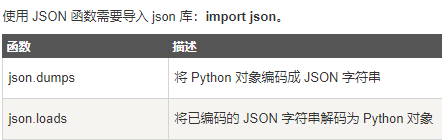

In [32]:
import json

jsonData = '{"a":1,"b":2,"c":3,"d":4,"e":5}';

text = json.loads(jsonData)
print(text)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}


In [33]:
type(text)

dict

In [34]:
import json

data = [ { 'a' : 1, 'b' : 2, 'c' : 3, 'd' : 4, 'e' : 5 } ]

data2 = json.dumps({'a': 'Runoob', 'b': 7}, sort_keys=True, indent=4, separators=(',', ': '))
print(data2)

{
    "a": "Runoob",
    "b": 7
}


In [35]:
type(data2)

str

## 补充：从socket到http

socket是tcp的实现，传输层 举个栗子:./Examples/socket/   
http是基于tcp的，应用层  
还有websocket 目的是在互联网上建立长连接  例如给直播视频等应用使用

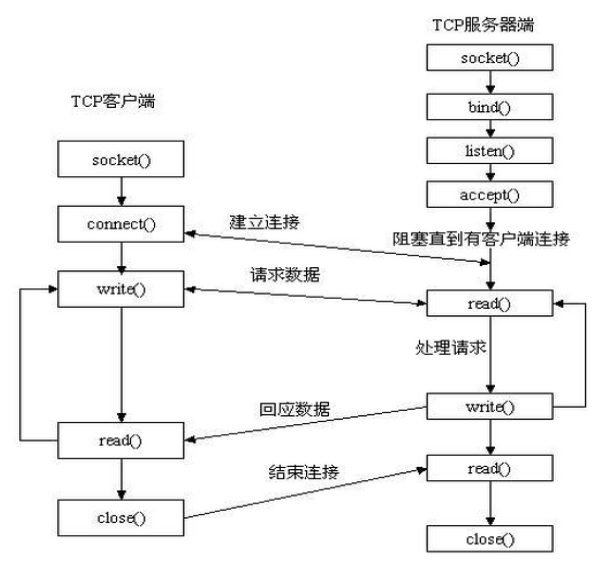

关于socket的案例 参见example/socket  
https://blog.csdn.net/su_bao/article/details/80380465

python内置的http协议urllib库

In [35]:
from urllib import request

with request.urlopen('http://httpbin.org/get') as f:
    data = f.read()

实际上返回的是字节流 网上传递的东西和硬盘存的东西是一样的 都叫做资源  
访问网络邻居的时候 和ftp的时候 是不是都一样是访问某个路径 只是加了ip的路径  
都是资源格式都一样 前面也讲过有大小端

In [36]:
data

b'{\n  "args": {}, \n  "headers": {\n    "Accept-Encoding": "identity", \n    "Host": "httpbin.org", \n    "User-Agent": "Python-urllib/3.8", \n    "X-Amzn-Trace-Id": "Root=1-5fce3d73-46bfae5029286fd32e483652"\n  }, \n  "origin": "172.105.231.194", \n  "url": "http://httpbin.org/get"\n}\n'

In [37]:
type(data)

bytes

现实中没人会用这个库 都直接用在他之上构建的requests

## 补充：web三剑客 html css js

### html的各种标签

https://zhuanlan.zhihu.com/p/68714088  
https://www.w3school.com.cn/html/index.asp

### js教程和前端书籍推荐  

https://www.w3school.com.cn/js/index.asp

纸质经典三本：（按顺序食用，新手村）
1. 犀牛书 JavaScript权威指南
2. 猫头鹰书 高性能JavaScript
3. 红书 JavaScript高级程序设计  

线上维护开源书籍：（快速看看，ES6在入门之后看）
1. 现代js教程 线上维护 https://zh.javascript.info/
2. ES6阮一峰 https://github.com/ruanyf/es6tutorial  

深入了解js的有意思的书：（打怪升级再用）
1. JavaScript忍者秘籍
2. 你不知道的JavaScript 
3. JavaScript语言精粹 
4. JavaScript函数式编程

jQuery时代：
1. 锋利的jQuery 虽然进入框架时代了 但是jquery还是偶尔有意外的作用  

框架时代：（官方文档 变化太快了书有点懵逼跟不上）
1. vue  
    1.1 https://cn.vuejs.org/
2. react  
    2.1 https://github.com/SangKa/react-in-patterns-cn  
    2.2 https://github.com/kenberkeley/redux-simple-tutorial

如果你贼心不死要做个全栈：
1. nodejs实战 
2. 深入浅出nodejs （手动点赞）

甚至想快速搞个跨平台桌面应用：（书害比较少 难以评价好坏）
1. Electron实战——入门、进阶与性能优化
2. Electron跨平台开发实战

### http rpc json rpc restful

restful其实是一种使用json模拟sql数据库管道的抽象 是把一切都当做名词增删改查 有时候不直观 引起程序员之间的撕逼

rpc是一种概念 就是访问别的机器的函数 广义的说http也是一种rpc 当然还有别的rpc实现方法 自己楞用socket写一个rpc方法也行 就是不通用别人看不大明白而已 json-rpc就是用json来访问别的机器的函数 rpc是把一切都当动词来看 程序员一般无痛食用  
推荐谷歌做的gRPC

HTTP 请求和 JSON-RPC https://www.jianshu.com/p/a72d226eef84

这些rpc和restful无非是为了服务器客户端之间沟通 还可以混搭 不必非要陷入真restful的陷阱 工具而已

### 微服务之类的玩意都是啥？

1. 单一应用架构：
当网站流量很小时，只需一个应用，将所有功能都部署在一起，以减少部署节点和成本。此时，用于简化增删改查工作量的 数据访问框架(ORM) 是关键。
2. 垂直应用架构：
当访问量逐渐增大，单一应用增加机器带来的加速度越来越小，将应用拆成互不相干的几个应用，以提升效率。此时，用于加速前端页面开发的 Web框架(MVC) 是关键。
3. 分布式服务架构：
当垂直应用越来越多，应用之间交互不可避免，将核心业务抽取出来，作为独立的服务，逐渐形成稳定的服务中心，使前端应用能更快速的响应多变的市场需求。此时，用于提高业务复用及整合的 分布式服务框架(RPC) 是关键。
4. 流动计算架构：
当服务越来越多，容量的评估，小服务资源的浪费等问题逐渐显现，此时需增加一个调度中心基于访问压力实时管理集群容量，提高集群利用率。此时，用于提高机器利用率的 资源调度和治理中心(SOA) 是关键。

### postman

原来是个chrome的插件 现在独立了  
安装 https://www.postman.com/  
也有别的api工具 http://www.apizza.net/  
用来测试接口 生成文档 

### google开发者工具

https://www.cnblogs.com/xiaowenshu/p/10450848.html  
https://www.w3cschool.cn/chromedevtools/

https://juejin.cn/book/6844733783166418958/section/6844733783187390477

# 爬虫概念相关

## requests

### requests简介 

Requests是用Python语言编写的，基于urllib3来改写的，采用Apache2 Licensed 来源协议的HTTP库。

它比urllib更加方便，可以节约我们大量的工作，完全满足HTTP测试需求。

In [11]:
!pip install requests

You should consider upgrading via the 'c:\pyenv\anaconda3\python.exe -m pip install --upgrade pip' command.


In [9]:
import requests
 
response  = requests.get("https://www.baidu.com")
print(type(response))
print(response.status_code)
print(type(response.text))
#获得响应头内容
print(response.headers)
print(response.headers['content-type'])
#还可以用这种方式获取请求头内容
print(response.request.headers)
 
response.enconding = 'utf-8'
print(response.text)
 
print(response.cookies)
 
print(response.content)
print(response.content.decode("utf-8"))

<class 'requests.models.Response'>
200
<class 'str'>
{'Cache-Control': 'private, no-cache, no-store, proxy-revalidate, no-transform', 'Connection': 'keep-alive', 'Content-Encoding': 'gzip', 'Content-Type': 'text/html', 'Date': 'Mon, 07 Dec 2020 14:21:30 GMT', 'Last-Modified': 'Mon, 23 Jan 2017 13:23:55 GMT', 'Pragma': 'no-cache', 'Server': 'bfe/1.0.8.18', 'Set-Cookie': 'BDORZ=27315; max-age=86400; domain=.baidu.com; path=/', 'Transfer-Encoding': 'chunked'}
text/html
{'User-Agent': 'python-requests/2.24.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}
<!DOCTYPE html>
<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=https://ss1.bdstatic.com/5eN1bjq8AAUYm2zgoY3K/r/www/cache/bdorz/baidu.min.css><title>ç¾åº¦ä¸ä¸ï¼ä½ å°±ç¥é</title></head> <body link=#0000cc> <div id=wrapper> <div id=hea

### 各种http方法

http://httpbin.org/  
https://github.com/postmanlabs/httpbin  
一个测试http各种方法的开源网站  

In [12]:
import requests
requests.post("http://httpbin.org/post")
requests.put("http://httpbin.org/put")
requests.delete("http://httpbin.org/delete")
requests.head("http://httpbin.org/get")
requests.options("http://httpbin.org/get")

<Response [200]>

http协议是个啥玩意  
无状态  
服务端必须等到请求request才能给响应response

get

In [29]:
import requests
 
url = 'http://httpbin.org/get'
response = requests.get(url)

In [33]:
dir(response)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [30]:
print(response.text)

{
  "args": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.24.0", 
    "X-Amzn-Trace-Id": "Root=1-5fce3ce7-78749dd161b4e540681e7f2d"
  }, 
  "origin": "172.105.231.194", 
  "url": "http://httpbin.org/get"
}



带参数的get

In [14]:
import requests
 
url = 'http://httpbin.org/get'
data = {
    'name':'zhangsan',
    'age':'25'
}
response = requests.get(url,params=data)
print(response.url)  # 其实get参数被解析到了url上  用等于来规定键值对 用&来区分不同键值对  换句话说 = 就是： & 就是；
print(response.text)

http://httpbin.org/get?name=zhangsan&age=25
{
  "args": {
    "age": "25", 
    "name": "zhangsan"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.24.0", 
    "X-Amzn-Trace-Id": "Root=1-5fce3b25-680c62fa38afe00c3fb5a17b"
  }, 
  "origin": "172.105.231.194", 
  "url": "http://httpbin.org/get?name=zhangsan&age=25"
}



用json解析response响应

In [18]:
import requests
import json
 
response = requests.get("http://httpbin.org/get")
print(type(response.text))
print(response.json())

<class 'str'>
{'args': {}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.24.0', 'X-Amzn-Trace-Id': 'Root=1-5fce3c20-080eac6a73cb2cd608ee2309'}, 'origin': '172.105.231.194', 'url': 'http://httpbin.org/get'}


In [28]:
print(json.loads(response.text))
print(type(response.json()))
print(response.json()['headers']['User-Agent'])

{'args': {}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.24.0', 'X-Amzn-Trace-Id': 'Root=1-5fce3c20-080eac6a73cb2cd608ee2309'}, 'origin': '172.105.231.194', 'url': 'http://httpbin.org/get'}
<class 'dict'>
python-requests/2.24.0


In [38]:
import requests
 
url = 'http://httpbin.org/post'
data = {
    'name':'jack',
    'age':'23'
    }
response = requests.post(url,data=data)
print(response.text)

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "age": "23", 
    "name": "jack"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "16", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.24.0", 
    "X-Amzn-Trace-Id": "Root=1-5fce3ecd-7c9c90d236ffb2c356b10828"
  }, 
  "json": null, 
  "origin": "172.105.231.194", 
  "url": "http://httpbin.org/post"
}



### 代理

正向代理与反向代理

正向代理：浏览器明确知道要访问的是什么服务器，只不过目前无法达到，需要通过代理来帮助完成这个请求操作。

反向代理：浏览器不知道任何关于要请求的服务器的信息，需要通过Nginx请求。

In [9]:
import requests
 
proxies = {
  "http": "http://127.0.0.1:7890",
  "https": "https://127.0.0.1:7890",
}
response = requests.get("https://www.google.com", proxies=proxies)
print(response.status_code)

200


### 关于headers

In [6]:
import requests
 
url = 'https://www.zhihu.com/'
response = requests.get(url)
response.encoding = "utf-8"
print(response.text)

<html>
<head><title>400 Bad Request</title></head>
<body bgcolor="white">
<center><h1>400 Bad Request</h1></center>
<hr><center>openresty</center>
</body>
</html>



<!doctype html>
<html lang="zh" data-hairline="true" data-theme="light"><head><meta charSet="utf-8"/><title data-react-helmet="true">知乎 - 有问题，上知乎</title><meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1"/><meta name="renderer" content="webkit"/><meta name="force-rendering" content="webkit"/><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/><meta name="google-site-verification" content="FTeR0c8arOPKh8c5DYh_9uu98_zJbaWw53J-Sch9MTg"/><meta name="description" property="og:description" content="有问题，上知乎。知乎，可信赖的问答社区，以让每个人高效获得可信赖的解答为使命。知乎凭借认真、专业和友善的社区氛围，结构化、易获得的优质内容，基于问答的内容生产方式和独特的社区机制，吸引、聚集了各行各业中大量的亲历者、内行人、领域专家、领域爱好者，将高质量的内容透过人的节点来成规模地生产和分享。用户通过问答等交流方式建立信任和连接，打造和提升个人影响力，并发现、获得新机会。"/><link data-react-helmet="true" rel="apple-touch-icon" href="https://static.zhihu.com/heifetz/assets/apple-touch-icon-152.67c7b278.png"/><link data-react-helmet="true" rel="apple-touch-icon" href="https://static.zhihu.com/heifetz/assets/apple-touch-icon-152.67c7b278.png"
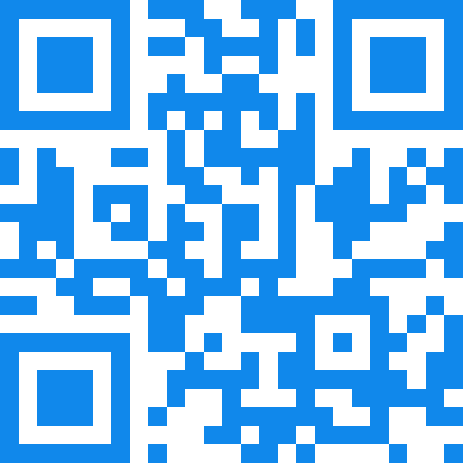

In [7]:
import requests
 
url = 'https://www.zhihu.com/'
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36'}
response = requests.get(url,headers=headers)
response.encoding = "utf-8"
print(response.text)

In [5]:
import requests 
from bs4 import BeautifulSoup 
session = requests.Session() 
headers = {"User-Agent":"Mozilla/5.0(Macintosh; Intel Mac OS X 10_9_5)AppleWebKit 537.36 (KHTML, like Gecko) Chrome","Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8"}
url = "https://www.whatismybrowser.com/developers/what-http-headers-is-my-browser-sending" 
req = session.get(url, headers=headers) 
bsObj = BeautifulSoup(req.text) 
print(bsObj.find("table",{"class":"table-striped"}).get_text)

AttributeError: 'NoneType' object has no attribute 'get_text'

### 上传文件

In [40]:
import requests
url = "http://httpbin.org/post"
files= {"files":open("./pic/1000.png","rb")}
response = requests.post(url,files=files)
print(response.text)

{
  "args": {}, 
  "data": "", 
  "files": {
    "files": "data:application/octet-stream;base64,iVBORw0KGgoAAAANSUhEUgAAAXIAAAHBCAYAAAB0ejDSAAAgAElEQVR4Xty9CbcrSXklulNSpsYz3nmo6dbIWAwFNDZeNma5vezu5+5/+Z5tMDSTvbxsbIyBtoEGMxiqGOyqoupW3ekMGlPKTL219xchpfKkpDy3bsFb7ywOt46UQ2RkxI4v9re/7ws+97nPz1H4CYIA/AXmmBe+tc/tJ//fZX/rIJ1fW7lD8Twd5m60+C6YI3cr932GIOC1lm1Y15ayZyp+VvXvsvaWfVb1eivHzcue5mzfzs8+cuntgjNvk9fih6vvwE5efpYmmX1SC9Sg2WyGMAwBZBgOh/jlL3+Jr//TP+HHP/kx0lmCWq2m95+mKeZZhrDecIMCqOkdAVmW6VfXrQeo1+0cvmuex2v4cbMcc3Yej7ExEQBzO8d/7o9dOYdj1Y23bJ4/3z2pa68fZ/7ffCcuv2Ofne2v4jnrxkDZtfNjfPk959myBevOy49x33/rxpq+X30oNwltPvF2y3/n+ruGwP3qbViX565Ry12TbzObc1TMkfGdzP3cLRtfZ1s5n9t4WAyW/FxeDHK+y2UL1vVzox5qHGVZqjb7Mbmz08UHPvABfPzjH8etW7fQbDZRr9c1ptnHjUZDx/oxdp65vO0dFZ/4URyfb9+66wWf/exfqcc2gXIRZM8HbIGGSfGneA3O2fygRpB/4W6G6uVuXxTyA3/TgF/33aM8p8o9iuCbByh//sMDOfusDMg1pRfN4/ziYA9qAWaz6WLAc+K99tqr+Jd/+Rd8+9vfxumgj3pgk8AmUaaJEdUbi8VYoEsgdoDsgZyLhH/vPIb3WwL2cgx68Fc/gIsFr8Vr2pjg55yIfiHgZwkXDfd9/prrxsImIF9nLOTP4X+fF8irjIVt

### cookies

In [41]:
import requests
response = requests.get('https://www.baidu.com')
print(response.cookies)
for key,value in response.cookies.items():
    print(key,'==',value)

<RequestsCookieJar[<Cookie BDORZ=27315 for .baidu.com/>]>
BDORZ == 27315


In [1]:
import requests
session = requests.session()
session.get('http://httpbin.org/cookies/set/number/12456')
response = session.get('http://httpbin.org/cookies')
print(response.text)

{
  "cookies": {
    "number": "12456"
  }
}



## beautifulsoup

爱丽丝梦游仙境   
Beautiful Soup, so rich and green, Waiting in a hot tureen! Who for such dainties would not stoop? Soup of the evening, beautiful Soup! Soup of the evening, beautiful Soup! Beau--ootiful Soo--oop! Beau--ootiful Soo--oop! Soo--oop of the e--e--evening, Beautiful, beautiful Soup!

In [2]:
!pip install beautifulsoup4

You should consider upgrading via the 'c:\pyenv\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
from bs4 import BeautifulSoup 

### 解析器

文档https://www.crummy.com/software/BeautifulSoup/bs4/doc/index.zh.html

安装解析器 lxml是c写的速度快 html5lib适配性强但速度慢

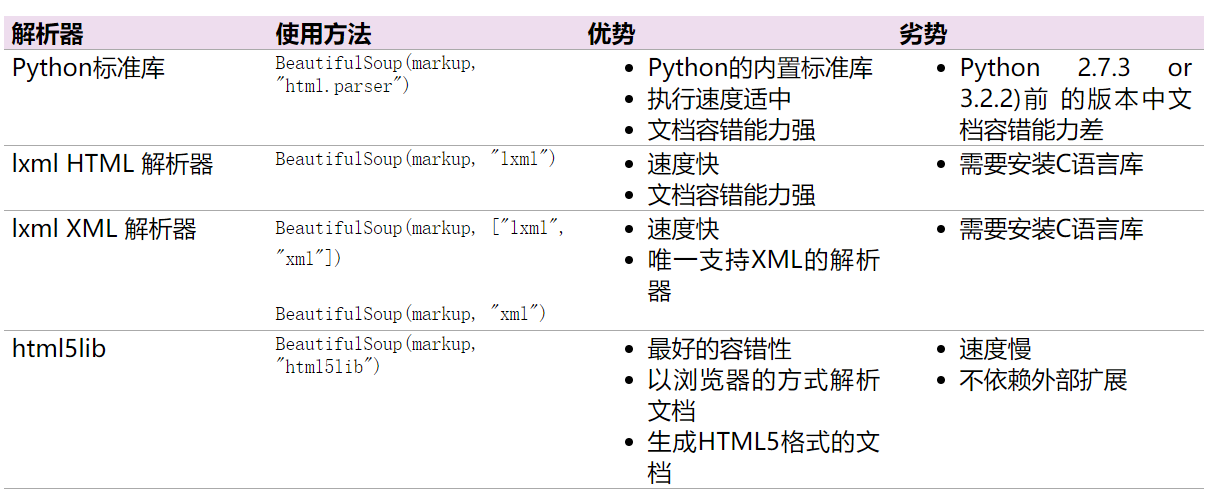

In [1]:
!pip install lxml
!pip install html5lib

You should consider upgrading via the 'c:\pyenv\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\pyenv\anaconda3\python.exe -m pip install --upgrade pip' command.


In [33]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

In [34]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc)

print(soup.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


soup对象装着一堆tag对象 而tag往往是爬虫要找的对象

### soup对象

In [5]:
soup  # 这是__repr__方法的效果 soup是一个对象

<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body></html>

### 直接方法 获得tag对象

直接拿到tag

In [6]:
soup.title
# <title>The Dormouse's story</title>

<title>The Dormouse's story</title>

In [14]:
soup.a #拿到第一个a标签

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [12]:
soup.b #拿到第一个b标签

<b>The Dormouse's story</b>

tag对象里面包含的字符串

In [7]:
soup.title.get_text() # 单独的tag获取文本 套路1 get_text()方法

"The Dormouse's story"

In [44]:
soup.title.string # 单独的tag获取文本 套路2 .string属性

"The Dormouse's story"

In [18]:
soup.title.text # 单独的tag获取文本 套路3 .text属性

"The Dormouse's story"

In [11]:
soup.get_text() # 对soup收集所有文本

"The Dormouse's story\n\nThe Dormouse's story\nOnce upon a time there were three little sisters; and their names were\nElsie,\nLacie and\nTillie;\nand they lived at the bottom of a well.\n...\n"

In [16]:
soup.text # 对soup收集所有文本

"The Dormouse's story\n\nThe Dormouse's story\nOnce upon a time there were three little sisters; and their names were\nElsie,\nLacie and\nTillie;\nand they lived at the bottom of a well.\n...\n"

In [10]:
soup.string # 毛输出都没 soup并不是一个tag

话说 这么多方法真不符合python的只有一条路去罗马的风格 挺讨厌的

可以通过节点层级关系在文档中游走  
节点有两类 tag对象和NavigableString对象

1. .contents .children 子节点列表 子节点生成器
2. .descendants 后代所有节点生成器
3. parent(s) 父节点 所有父辈节点生成器
4. next_sibling(s) previous_sibling(s) 兄节点 弟节点 兄弟节点生成器
5. next_element(s) previous_element(s) 解析顺序前后节点 前后所有节点生成器

.contents会返回一个列表 装着所有子tag

In [19]:
soup.html.contents

[<head><title>The Dormouse's story</title></head>,
 '\n',
 <body>
 <p class="title"><b>The Dormouse's story</b></p>
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>
 <p class="story">...</p>
 </body>]

In [20]:
soup.html.contents[0]

<head><title>The Dormouse's story</title></head>

In [24]:
len(soup.html.contents)

3

In [25]:
type(soup.html.contents[1])

bs4.element.NavigableString

.children是一个生成器

In [35]:
for child in soup.html.children:
    print(type(child))

<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>


In [39]:
soup.html.contents[1] # 莫名其妙的问题 并不全是tag 会拿到NavigableString

'\n'

.descendants 递归所有后代

In [37]:
for child in soup.html.descendants:
    print(type(child))

<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>


In [38]:
for child in soup.html.descendants:
    print(child)

<head><title>The Dormouse's story</title></head>
<title>The Dormouse's story</title>
The Dormouse's story


<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body>


<p class="title"><b>The Dormouse's story</b></p>
<b>The Dormouse's story</b>
The Dormouse's story


<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.

### 搜索方法 获得tag对象

find会找到第一个符合条件的

In [13]:
soup.find(id="link3").name

'a'

In [16]:
soup.find(id="link3")['class']

['sister']

In [17]:
soup.find(id="link3")['href']

'http://example.com/tillie'

In [19]:
soup.find(id="link3").contents[0]

'Tillie'

In [43]:
soup.find(id="link3").string

'Tillie'

最常用的是：find_all( name , attrs , recursive , text , **kwargs )

name 参数可以查找所有名字为 name 的tag,字符串对象会被自动忽略掉

In [24]:
soup.find_all("title") #不指定参数 就是搜标签名

[<title>The Dormouse's story</title>]

attrs 参数可以查找属性

In [42]:
soup.find_all(id='link2') #指定参数id 就搜id这个属性了

[<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>]

In [26]:
soup.find_all(href=re.compile("elsie"))

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>]

id=True 只要有id就行

In [27]:
soup.find_all(id=True)

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

多重条件

In [32]:
soup.find_all(href=re.compile("ie"), id='link2')

[<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>]

text参数 查找内容

In [34]:
soup.find_all(text=re.compile("st"))

["The Dormouse's story",
 "The Dormouse's story",
 'Once upon a time there were three little sisters; and their names were\n']

limit参数  
find_all() 方法返回全部的搜索结构,如果文档树很大那么搜索会很慢  
当搜索到的结果数量达到 limit 的限制时,就停止搜索返回结果.

In [40]:
soup.find_all(text=re.compile("st"), limit=2)

["The Dormouse's story", "The Dormouse's story"]

recursive 参数 递归搜索  
调用tag的 find_all() 方法时,Beautiful Soup会检索当前tag的所有子孙节点,如果只想搜索tag的直接子节点,可以使用参数 recursive=False .

为了方便 可以给find_all直接简写

In [33]:
soup.find_all("a")## 简写为：
soup("a")

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

### css选择器方法 获得tag对象

https://www.runoob.com/cssref/css-selectors.html

### 杂七杂八

编码问题查看文档  
https://www.crummy.com/software/BeautifulSoup/bs4/doc/index.zh.html#unicode-dammit  
UnicodeDammit是bs自带的编码推断器 如果已经pip安装了前文介绍的chardet 则UnicodeDammit功能会得到增强

### xpath

lxml不仅是解析器，其实自己也是个好用的库  
文档：https://lxml.de/index.html

In [5]:
html_doc = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Title</title>
</head>
<body>

<div class="d1">
    <div class="d2">
            <p class="story">
                <a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
                <a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
                <a href="http://example.com/tillie" id="link3">Tillie</a>
            </p>
    </div>
    <div>
        <p id="p1">ALex is dsb</p>
        <p id="p2">Egon too</p>
    </div>
</div>

<div class="d3">
    <a href="http://www.baidu.com">baidu</a>
    <p>百度</p>
</div>

</body>
</html>
"""

from lxml import etree
selector=etree.HTML(html_doc) # 将源码转化为能被XPath匹配的格式

xpath获取，浏览器开发者工具右键获取xpath  
/html/body/div[4]/div[2]/div/div[1]/div[1]/div[120]/div[2]/div[3]/p

In [4]:
selector

<Element html at 0x7f5e4a0b46c0>

https://www.runoob.com/xpath/xpath-syntax.html

使用chrome开发者工具 
    1. 在页面检查之后 element界面右键copy xpath和full xpath
    2. 在控制台使用\$x('xpath路径')反向寻找定位

## selenium

https://python-selenium-zh.readthedocs.io/zh_CN/latest/2.%E5%BC%80%E5%A7%8B/

HeadlessChrome和PhantomJS是相似的工具，它们都可以用来在headless环境下进行自动化测试。  
两者的主要不同是Phantom用一个更老版本的WebKit作为渲染引擎，  
而HeadlessChrome使用最新版本的Blink作为渲染引擎。  
现在，Phantom也提供了一个比DevTools协议更高级的API

浏览器驱动下载  
https://sites.google.com/a/chromium.org/chromedriver/home

正常浏览器动作

b站自寻教程

In [4]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome()
driver.get("http://www.python.org")
assert "Python" in driver.title
elem = driver.find_element_by_name("q")
elem.send_keys("requests")
elem.send_keys(Keys.RETURN)
assert "No results found." not in driver.page_source
driver.close()

In [3]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys


options = webdriver.ChromeOptions()

options.add_argument("--headless")
options.add_argument("--disable-gpu")

driver = webdriver.Chrome(chrome_options=options)
driver.get("http://www.python.org")
assert "Python" in driver.title
elem = driver.find_element_by_name("q")
elem.send_keys("pycon")
elem.send_keys(Keys.RETURN)
assert "No results found." not in driver.page_source
driver.close()

<ipython-input-3-5bd30c88f0ef>:10: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=options)


微软自动化工具 playwright

In [2]:
!pip install playwright

ERROR: Could not find a version that satisfies the requirement playwright
ERROR: No matching distribution found for playwright


In [3]:
!python -m playwright install  # 最好在命令行用管理员模式运行

^C


https://github.com/microsoft/playwright-python  
https://microsoft.github.io/playwright-python/

## scrapy

文档 https://docs.scrapy.org/en/latest/

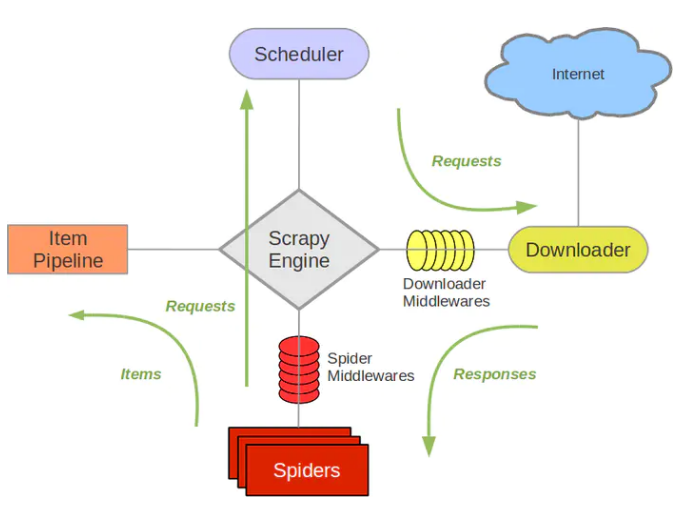

### 结构

1. Spiders：爬虫，定义了爬取的逻辑和网页内容的解析规则，主要负责解析响应并生成结果和新的请求
2. Engine：引擎，处理整个系统的数据流处理，出发事物，框架的核心。
3. Scheduler：调度器，接受引擎发过来的请求，并将其加入队列中，在引擎再次请求时将请求提供给引擎
4. Downloader：下载器，下载网页内容，并将下载内容返回给spider
5. ItemPipeline：项目管道，负责处理spider从网页中抽取的数据，主要是负责清洗，验证和向数据库中存储数据
6. Downloader Middlewares：下载中间件，是处于Scrapy的Request和Requesponse之间的处理模块
7. Spider Middlewares：spider中间件，位于引擎和spider之间的框架，主要处理spider输入的响应和输出的结果及新的请求middlewares.py里实现

### 流程

1. spider的yeild将request发送给engine
2. engine对request不做任何处理发送给scheduler
3. scheduler，生成request交给engine
4. engine拿到request，通过middleware发送给downloader
5. downloader在\获取到response之后，又经过middleware发送给engine
6. engine获取到response之后，返回给spider，spider的parse()方法对获取到的response进行处理，解析出items或者requests
7. 将解析出来的items或者requests发送给engine
8. engine获取到items或者requests，将items发送给ItemPipeline，将requests发送给scheduler（ps，只有调度器中不存在request时，程序才停止，及时请求失败scrapy也会重新进行请求）


## 数据库

Navicat数据可视化工具  http://www.navicat.com.cn/

### sqlite

In [38]:
import sqlite3 # python已经内置了

con1 = sqlite3.connect('./source/sqlite-test.db') #硬盘建表
con2 = sqlite3.connect(':memory:') #内存建表



参见教程  https://www.runoob.com/sqlite/sqlite-python.html

### MySQL

一定要先装上mysql

In [40]:
!pip install MySQL-python

  Running setup.py clean for MySQL-python
Failed to build MySQL-python
    Running setup.py install for MySQL-python: started
    Running setup.py install for MySQL-python: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'c:\pyenv\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Think\\AppData\\Local\\Temp\\pip-install-tr_blmke\\mysql-python\\setup.py'"'"'; __file__='"'"'C:\\Users\\Think\\AppData\\Local\\Temp\\pip-install-tr_blmke\\mysql-python\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Think\AppData\Local\Temp\pip-wheel-luxnorpw'
       cwd: C:\Users\Think\AppData\Local\Temp\pip-install-tr_blmke\mysql-python\
  Complete output (28 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  copying _mysql_exceptions.py -> build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\MySQLdb
  copying MySQLdb\__init__.py -> build\lib.win-amd64-3.8\MySQLdb
  copying MySQLdb\converters.py -> 

In [41]:
import MySQLdb

ModuleNotFoundError: No module named 'MySQLdb'

直接丢教程 https://www.runoob.com/python/python-mysql.html

### MongoDB

官网安装free版本的mongodb还附带安装一个可视化工具compass

参考文档 https://www.runoob.com/python3/python-mongodb.html

In [43]:
!pip install pymongo

### Redis

参考文档 https://www.runoob.com/w3cnote/python-redis-intro.html

介绍 https://www.cnblogs.com/john-xiong/p/12089103.html

### 消息队列 kafka集群他不香么

官方 http://kafka.apache.org/  
python库 https://pypi.org/project/kafka-python/  
民间介绍 https://zhuanlan.zhihu.com/p/38330574  
民间介绍概念 https://www.jianshu.com/p/f57e51db434d

### 小结

数据库性能对比  
https://zhuanlan.zhihu.com/p/86777551  
https://www.jianshu.com/p/2b523fbee36f

## 反爬虫和绕过

1. 信息校验

2. 动态渲染

3. 文本混淆

4. 特征识别

5. app爬虫

6. 验证码验证么  

《python3反爬虫原理与绕过实战》 2019-6

网络安全 用于祭天

黑产 撞库 社工  
https://zhuanlan.zhihu.com/p/26727341

# 爬虫结构

最近的案例说明： https://zhuanlan.zhihu.com/p/97291320

# 爬虫案例

## 静态爬虫语言排行榜

### bs写法

In [59]:
import json
import requests
from bs4 import BeautifulSoup
import bs4
import time

url = 'https://www.tiobe.com/tiobe-index/'


def one_to_page_selector(html):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36'
    }

    response = requests.get(url, headers=headers,timeout=30)
    body = response.text                    # 获取网页内容

    if response.status_code == 200:
        soup = BeautifulSoup(body, 'lxml')

        result = soup.select('table.table.table-striped.table-top20 > tbody > tr') # css选择器语法

        # 封装对应元素-便于操作
        datadic = []
        for i in range(len(result)):
            datadic.append([result[i].select('td')[0].get_text(),
                            result[i].select('td')[1].get_text(),
                            result[i].select('td')[3].get_text(),  # 中间有个箭头的字段，不要
                            result[i].select('td')[4].get_text(),
                            result[i].select('td')[5].get_text()
                           ])
        return datadic
    else:
        print('error', response.status_code)
        return None
    
def one_to_page_tagfind(html):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36'
    }

    response = requests.get(url, headers=headers,timeout=30)
    body = response.text                    # 获取网页内容

    if response.status_code == 200:
        soup = BeautifulSoup(body, 'lxml')

        # 封装对应元素-便于操作
        datadic = []
        for i in soup.tbody.contents:
            if i!= '\n':
                tmp = []
                for j in i.find_all('td'):
                    if j.text!= '':
                        tmp.append(j.text)
                datadic.append(tmp)
        return datadic
    else:
        print('error', response.status_code)
        return None  
    



def write_file(data):  # 将list数据重组成字典写入文件并输出
    for i in data:
        sul={
            '2018年6月排行':i[0],
            '2017年6排行':i[1],
            '开发语言':i[2],
            '评级':i[3],
            '变化率':i[4]
        }
        with open('./source/tiobe-index-bs.json','a',encoding='utf-8') as f:
            f.write(json.dumps(sul,ensure_ascii=False) + '\n') #必须格式化数据
            f.close()
        print(sul)
    return None
    


def main():
    url = 'https://www.tiobe.com/tiobe-index/'
    data = one_to_page_tagfind(url)
    revaule = write_file(data)


In [60]:
main()

{'2018年6月排行': '1', '2017年6排行': '2', '开发语言': 'C', '评级': '16.48%', '变化率': '+0.40%'}
{'2018年6月排行': '2', '2017年6排行': '1', '开发语言': 'Java', '评级': '12.53%', '变化率': '-4.72%'}
{'2018年6月排行': '3', '2017年6排行': '3', '开发语言': 'Python', '评级': '12.21%', '变化率': '+1.90%'}
{'2018年6月排行': '4', '2017年6排行': '4', '开发语言': 'C++', '评级': '6.91%', '变化率': '+0.71%'}
{'2018年6月排行': '5', '2017年6排行': '5', '开发语言': 'C#', '评级': '4.20%', '变化率': '-0.60%'}
{'2018年6月排行': '6', '2017年6排行': '6', '开发语言': 'Visual Basic', '评级': '3.92%', '变化率': '-0.83%'}
{'2018年6月排行': '7', '2017年6排行': '7', '开发语言': 'JavaScript', '评级': '2.35%', '变化率': '+0.26%'}
{'2018年6月排行': '8', '2017年6排行': '8', '开发语言': 'PHP', '评级': '2.12%', '变化率': '+0.07%'}
{'2018年6月排行': '9', '2017年6排行': '16', '开发语言': 'R', '评级': '1.60%', '变化率': '+0.60%'}
{'2018年6月排行': '10', '2017年6排行': '9', '开发语言': 'SQL', '评级': '1.53%', '变化率': '-0.31%'}
{'2018年6月排行': '11', '2017年6排行': '22', '开发语言': 'Groovy', '评级': '1.53%', '变化率': '+0.69%'}
{'2018年6月排行': '12', '2017年6排行': '14', '开发语言': 'Assembly langua

### xpath写法

In [22]:
import requests
from requests.exceptions import RequestException
from lxml import etree
from lxml.etree import ParseError
import json

def one_to_page(url):
    headers={
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.62 Safari/537.36'
    }
    body = ''
    try:
        response=requests.get(url,headers=headers)
        body=response.text  #获取网页内容
    except RequestException as e:
        print('request is error!',e)
        
    try:
        html=etree.HTML(body,etree.HTMLParser())  #解析HTML文本内容
        result=html.xpath('//table[contains(@class,"table-top20")]/tbody/tr//text()') #获取列表数据
        pos = 0
        for i in range(20):
            if i == 0:
                yield result[i:5]
            else:
                yield result[pos:pos+5]  #返回排名生成器数据
            pos+=5
    except ParseError as e:
         print(e.position)


def write_file(data):   #将数据重新组合成字典写入文件并输出
    for i in data:
        sul={
            '2018年6月排行':i[0],
            '2017年6排行':i[1],
            '开发语言':i[2],
            '评级':i[3],
            '变化率':i[4]
        }
        with open('./source/tiobe-index.json','a',encoding='utf-8') as f:
            f.write(json.dumps(sul,ensure_ascii=False) + '\n') #必须格式化数据
            f.close()
        print(sul)
    return None


def main():
    url='https://www.tiobe.com/tiobe-index/'
    data=one_to_page(url)
    revaule=write_file(data)

In [23]:
main()

{'2018年6月排行': '1', '2017年6排行': '2', '开发语言': 'C', '评级': '16.48%', '变化率': '+0.40%'}
{'2018年6月排行': '2', '2017年6排行': '1', '开发语言': 'Java', '评级': '12.53%', '变化率': '-4.72%'}
{'2018年6月排行': '3', '2017年6排行': '3', '开发语言': 'Python', '评级': '12.21%', '变化率': '+1.90%'}
{'2018年6月排行': '4', '2017年6排行': '4', '开发语言': 'C++', '评级': '6.91%', '变化率': '+0.71%'}
{'2018年6月排行': '5', '2017年6排行': '5', '开发语言': 'C#', '评级': '4.20%', '变化率': '-0.60%'}
{'2018年6月排行': '6', '2017年6排行': '6', '开发语言': 'Visual Basic', '评级': '3.92%', '变化率': '-0.83%'}
{'2018年6月排行': '7', '2017年6排行': '7', '开发语言': 'JavaScript', '评级': '2.35%', '变化率': '+0.26%'}
{'2018年6月排行': '8', '2017年6排行': '8', '开发语言': 'PHP', '评级': '2.12%', '变化率': '+0.07%'}
{'2018年6月排行': '9', '2017年6排行': '16', '开发语言': 'R', '评级': '1.60%', '变化率': '+0.60%'}
{'2018年6月排行': '10', '2017年6排行': '9', '开发语言': 'SQL', '评级': '1.53%', '变化率': '-0.31%'}
{'2018年6月排行': '11', '2017年6排行': '22', '开发语言': 'Groovy', '评级': '1.53%', '变化率': '+0.69%'}
{'2018年6月排行': '12', '2017年6排行': '14', '开发语言': 'Assembly langua

## 爬取github账号

In [17]:
import requests
url = 'https://api.github.com/users/gx1989mao/repos'
response = requests.get(url)

In [28]:
type(response.text)

str

In [18]:
import json
str_json = json.loads(response.text)

In [29]:
type(str_json)

list

In [25]:
len(str_json)

7

In [26]:
print(json.dumps(str_json,indent=4))

[
    {
        "id": 318835521,
        "node_id": "MDEwOlJlcG9zaXRvcnkzMTg4MzU1MjE=",
        "name": "eegpros",
        "full_name": "gx1989mao/eegpros",
        "private": false,
        "owner": {
            "login": "gx1989mao",
            "id": 25743094,
            "node_id": "MDQ6VXNlcjI1NzQzMDk0",
            "avatar_url": "https://avatars3.githubusercontent.com/u/25743094?v=4",
            "gravatar_id": "",
            "url": "https://api.github.com/users/gx1989mao",
            "html_url": "https://github.com/gx1989mao",
            "followers_url": "https://api.github.com/users/gx1989mao/followers",
            "following_url": "https://api.github.com/users/gx1989mao/following{/other_user}",
            "gists_url": "https://api.github.com/users/gx1989mao/gists{/gist_id}",
            "starred_url": "https://api.github.com/users/gx1989mao/starred{/owner}{/repo}",
            "subscriptions_url": "https://api.github.com/users/gx1989mao/subscriptions",
            "organi

判断仓库名相似度

In [27]:
import difflib

#判断相似度的方法，用到了difflib库
def get_equal_rate(str1, str2):
    return difflib.SequenceMatcher(None, str1, str2).quick_ratio()

get_equal_rate('leetcode', 'Leetcode')

0.875

导入信息

In [62]:
import pandas as pd
import numpy as np

NT = pd.read_excel('./name_total.xlsx',header=None) # 记得设置没有首行 否则第一行就被当成列标了
NT = np.array(NT)

NG = pd.read_excel('./names.xlsx',header=None) # 这里面有github地址
NG = np.array(NG)

In [63]:
name_total = list(NT[:,1])
names = list(NG[:,2])

In [64]:
len(name_total)

70

In [65]:
len(names)

64

In [66]:
res_names = [i for i in name_total if i not in names] # 补选的孩子们
res_names

['马宁', '陈诺', '郑绎函', '徐梦颖', '王清妍', '胡炫', '厉超群', '朱林杰']

In [67]:
list(set(name_total)-set(names))  # 集合直接做减法 也行 但是集合是无序的

['胡炫', '陈诺', '郑绎函', '王清妍', '朱林杰', '徐梦颖', '厉超群', '马宁']

In [9]:
git_ready_names = [(NG[i,2],NG[i,3]) for i in range(len(names)) if NG[i,3] == NG[i,3]]  # nan != nan 所以有此骚操作
len(git_ready_names)

59

In [10]:
git_ready_names[0][1].split('/')

['https:', '', 'github.com', 'deb91049', 'leetcode']

In [12]:
git_ready_names[0][1].split('/')[3]

'deb91049'

In [56]:
import requests
import json
import time 
import base64
import pandas as pd
import numpy as np

url = 'https://api.github.com/repos/{}/{}'
url_nrepo = 'https://api.github.com/users/{}/repos'

proxy={
    'http':'127.0.0.1:7890',
    'https':'127.0.0.1:7890',
}   # 代理要自己设置 emm

serect = '195ac53f8246d14d6c44' + ":"+'3c9c6b227a37cb0908c16b7fbc9eeac1d12fea55'   # biechaowo 
bs = str(base64.b64encode(serect.encode("utf-8")), "utf-8")
headers = {"Authorization": "Basic {}".format(bs)}

res = []

for i in git_ready_names:
    tmp=[]
    tmp.append(i[0])
    if i[1].split('/')[2]!='github.com':
        print('not github:',end='')
        print(i)
        tmp.append(i[1])
        tmp.append('-2')
        res.append(tmp)
        continue
        
    if len(i[1].split('/'))==5:  # 已经包含了仓库名
        real_url = url.format(i[1].split('/')[3],i[1].split('/')[4]) # 填充用户名和仓库名
        print(real_url)
        response = requests.get(real_url,proxies=proxy,headers=headers)
        str_json = json.loads(response.text) #转字典
        tmp.append(i[1])
        if 'size' not in str_json.keys():
            print(str_json)
            tmp.append('-1')
            res.append(tmp)
            continue
        else:
            print(str_json['size'])
            tmp.append(str(str_json['size']))
            res.append(tmp)
        
    elif len(i[1].split('/'))==4:  # 没写仓库名 自己找最像的仓库
        real_url = url_nrepo.format(i[1].split('/')[3]) # 填充用户名
        print(real_url)
        response = requests.get(real_url,proxies=proxy,headers=headers)
        str_json = json.loads(response.text) #转字典
        print('repos num:'+str(len(str_json)))
        
        diffcode = 0
        for j in str_json:
#             print(str(j['name'])+' '+str(j['size']),end='  ')
            if get_equal_rate('leetcode',str(j['name']))>diffcode:
                tmp_repo_name = str(j['name'])
                tmp_repo_size = str(j['size'])
                tmp_repo_name_url = str(j['html_url'])
                diffcode = get_equal_rate('leetcode',str(j['name']))
        print(tmp_repo_name+' '+tmp_repo_size)
        tmp.append(tmp_repo_name_url)
        tmp.append(tmp_repo_size)
        res.append(tmp)


https://api.github.com/repos/deb91049/leetcode
16
https://api.github.com/repos/luziy/leetcode
0
https://api.github.com/repos/hrf1007/leetcode
0
https://api.github.com/users/awan177/repos
repos num:1
leetcode 48
https://api.github.com/repos/ssj711/leetcode
12
https://api.github.com/repos/LFL1999/leetcode
0
https://api.github.com/repos/Yuhaobin-sys/Leetcode
25
https://api.github.com/repos/Chen990925/leetcode
8
https://api.github.com/repos/S1MPLE-S1/leetcode
0
https://api.github.com/repos/hgddjc/leetcode
0
https://api.github.com/repos/htxzds/leetcode
8
https://api.github.com/repos/Zhuboze/leetcode
0
https://api.github.com/repos/coldswggz/leetcode
3
https://api.github.com/repos/Double-T126/leetcode
0
https://api.github.com/repos/satellites7/leetcode
1
https://api.github.com/repos/shitshitme/leetcode
0
https://api.github.com/repos/YoloLJH/LeetCode
0
https://api.github.com/repos/chenqingpeng/wensente
0
https://api.github.com/repos/haiyin-33/python-2020
{'message': 'Not Found', 'documentation

In [57]:
import copy
rest_names = list(set(name_total)-set(np.array(res)[:,0]))
res1 = res.copy()  # 要用深拷贝 上面res获得需要花时间 这里写的时候不要破坏原始数据 
[res1.append([i,'','']) for i in rest_names]

[None, None, None, None, None, None, None, None, None, None, None]

In [59]:
res1

[['代文博', 'https://github.com/deb91049/leetcode', '16'],
 ['周江南', 'https://github.com/luziy/leetcode', '0'],
 ['黄容芬', 'https://github.com/hrf1007/leetcode', '0'],
 ['孙雯悦', 'https://github.com/awan177/leetcode', '48'],
 ['沈思佳', 'https://github.com/ssj711/leetcode', '12'],
 ['李冯亮', 'https://github.com/LFL1999/leetcode', '0'],
 ['俞浩斌', 'https://github.com/Yuhaobin-sys/Leetcode', '25'],
 ['陈俊霖', 'https://github.com/Chen990925/leetcode', '8'],
 ['王炜', 'https://github.com/S1MPLE-S1/leetcode', '0'],
 ['陈建栋', 'https://github.com/hgddjc/leetcode', '0'],
 ['胡添翕', 'https://github.com/htxzds/leetcode', '8'],
 ['朱博泽', 'https://github.com/Zhuboze/leetcode', '0'],
 ['陈炬锋', 'https://github.com/coldswggz/leetcode', '3'],
 ['唐韬', 'https://github.com/Double-T126/leetcode', '0'],
 ['陈晓刚', 'https://github.com/satellites7/leetcode', '1'],
 ['吴荣军', 'https://github.com/shitshitme/leetcode', '0'],
 ['刘珈赫', 'https://github.com/YoloLJH/LeetCode', '0'],
 ['陈庆鹏', 'https://github.com/chenqingpeng/wensente', '0'],
 [

In [61]:
res_df = pd.DataFrame(data=res1)
res_df.to_csv("./homework.csv", encoding="utf-8-sig", mode="w", header=False, index=False)  # mode w就是覆盖写入 a就是追加 和open类似

## 抓包 代理 公众号爬虫

https://juejin.cn/book/6844733701339742216/section/6844733701385895943

HTTP代理工具又称为抓包工具，主流的抓包工具 Windows 平台有 Fiddler，macOS 有 Charles，阿里开源了一款工具叫 AnyProxy。它们的基本原理都是类似的，就是通过在手机客户端设置好代理IP和端口，客户端所有的 HTTP、HTTPS 请求就会经过代理工具，在代理工具中就可以清晰地看到每个请求的细节，可以分析出每个请求是如何构造的，弄清楚这些之后，我们就可以用代码模拟发起请求，进而得到我们想要的数据。

fiddler：https://www.telerik.com/download/fiddler

1. 打开pc端的fiddler做成代理  
2. 打开手机的wifi网络设置代理 ip和端口在pc端的fiddler上查看 一般默认是8888  
3. 安装https的证书 FiddlerRoot certificate  
4. 手机打开公众号 因为访问流程经过fiddler 所以可以在fiddler中截获请求信息和响应数据  
5. 肉眼观察哪条请求是感兴趣的数据 模拟请求头 注意保存cookie  
6. requests自己写一个请求使用步骤5得到的请求头  
7. 判断超时或者cookie过期等不出意外的意外情况  
8. 分析下拉加载更多的动作 用代码模拟  
9. 数据保存MongoDB或者别的什么玩意里面

萌新用chrome开发者工具 进阶上fiddler 高玩用wireshark

## app爬虫 小程序爬虫

appium 是一个链接selenium和app的工具  
官网 http://appium.io/  
简单使用：https://www.cnblogs.com/graybird/p/10793423.html  
b站自己寻觅一些教程吧 可以单开一门课了